# Statystyka zbiór wzorów

In [1]:
# Implementacje statystyk opisowych
#install.packages("moments")
library(moments)
moment_centralny <- function(dane, rzad){mean((dane - mean(dane)) ^ rzad) }
moment_centralny_rounded <- function(dane,rzad){ round(mean((dane - mean(dane)) ^ rzad),2) }
wariancja <- function(dane){ sum((dane-mean(dane)) ^ 2) / (length(dane)-1) }
wariancja_populacji <- function(dane){sum((dane-mean(dane)) ^ 2) / (length(dane))}
odchylenie_std <- function(dane){sqrt(wariancja(dane))}
odchylenie_std_populacji <- function(dane){sqrt(wariancja_populacji(dane))}
skosnosc <- function(dane){moment_centralny(dane,3) / (odchylenie_std_populacji(dane)^3)}
kurtoza <- function(dane){moment_centralny(dane,4) / odchylenie_std(dane)^4}
kurtoza_min3 <- function(dane){moment_centralny(dane,4) / odchylenie_std(dane)^4 - 3}
mode <- function(dane){ uniqv <- unique(dane); uniqv[which.max(tabulate(match(dane,uniqv)))]}
alt_skewness <- function(dane){(mean(dane)-mode(dane)) / odchylenie_std(dane)}

### Podstawowe statystyki opisowe

In [2]:
dane <- c(6,2,5,3,0,8,6,7,5,3)

sort(dane)
summary(dane)
print(paste("Rozstęp: ",summary(dane)[6]-summary(dane)[1])) #rozstęp
print(paste("Odstęp międzykwartylowy: ",summary(dane)[5]-summary(dane)[2])) #odstęp międzykwartylowy
print(paste("Wariancja: ", wariancja(dane)))
print(paste("Wariancja pop: ", wariancja_populacji(dane)))
print(paste("Odchylenie standardowe: ", odchylenie_std(dane)))
print(paste("Odchylenie standardowe pop: ", odchylenie_std_populacji(dane)))
print(paste("Skośność: ", skewness(dane)))
print(paste("Kurtoza: ", kurtosis(dane)))
print(paste("Kurtoza-3: ", kurtoza_min3(dane)))
print(paste("Dominanta: ", mode(dane)))
print(paste("Alternatywna skośność: ", alt_skewness(dane)))

[1] 0 2 3 3 5 5 6 6 7 8

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     3.0     5.0     4.5     6.0     8.0 

[1] "Rozstęp:  8"
[1] "Odstęp międzykwartylowy:  3"
[1] "Wariancja:  6.05555555555556"
[1] "Wariancja pop:  5.45"
[1] "Odchylenie standardowe:  2.46080384337223"
[1] "Odchylenie standardowe pop:  2.33452350598575"
[1] "Skośność:  -0.377264971929353"
[1] "Kurtoza:  2.21740594226075"
[1] "Kurtoza-3:  -1.20390118676879"
[1] "Dominanta:  6"
[1] "Alternatywna skośność:  -0.609556915330737"


### Test Z

In [4]:
# test Z
mu_0 <- 129
sigma <- 11
n <- 25
mu <- 121.8
alpha <- 0.05
Z <- ((mu - mu_0)/sigma)*sqrt(n)
cat("Wartość statystyki",Z)

# Zakomentuj niepotrzebne
Z_alpha <- qnorm(alpha) # lewostronny
#  Z_alpha <- qnorm(1-alpha) # prawostronny
# Z_alpha <- qnorm(1-alpha/2) # obustronny
cat("\nWartość krytyczna:",Z_alpha)

cat("\nCzy odrzucić:",Z < Z_alpha) # Czy odrzucic H0 na rzecz H1, lewostronny
# cat("\nCzy odrzucić:",Z > Z_alpha) # Czy odrzucic H0 na rzecz H1, prawostronny
# cat("\nCzy odrzucić:",(Z > Z_alpha) || (Z < -Z_alpha))# Czy odrzucic H0 na rzecz H1, obustronny

Wartość statystyki -3.272727
Wartość krytyczna: -1.644854
Czy odrzucić: TRUE

### Test T

In [17]:
# test T
mu_0 <- 192
sigma <- 11
n <- 25
mu <- 121.8
alpha <- 0.05
T <- ((mu - mu_0)/sigma)*sqrt(n)
cat("Wartość statystyki",T)

# Zakomentuj niepotrzebne
# T_alpha <- qt(alpha, n-1) # lewostronny
T_alpha <- qt(1-alpha, n-1) # prawostronny
# T_alpha <- qt(1-alpha/2, n-1) # obustronny

cat("\nWartość krytyczna:",T_alpha,"\n")

# cat("\nCzy odrzucić:",T < T_alpha) # Czy odrzucic H0 na rzecz H1, lewostronny
cat("Czy odrzucić:",T > T_alpha) # Czy odrzucic H0 na rzecz H1, prawostronny
# cat("Czy odrzucić:",(T > T_alpha) || (T < -T_alpha)) # Czy odrzucic H0 na rzecz H1, obustronny

Wartość statystyki -31.90909
Wartość krytyczna: 1.710882 
Czy odrzucić: FALSE

### Test F (wariancja)

### Test frakcji

In [5]:
# test frakcji
p_0 <- 0.25
p <- 5/49
sigma <- sqrt(p_0*(1-p_0))
n <- 49
alpha <- 0.02
Z <- ((p-p_0)/sigma)*sqrt(n)

cat("Wartość statystyki: ",Z)

# Zakomentuj niepotrzebne
Z_alpha <- qnorm(alpha, 0, 1) # lewostronny
#Z_alpha <- qnorm(1-alpha, 0, 1) # prawostronny
# Z_alpha <- qnorm(1-alpha/2, 0, 1) # prawostronny

cat("\nWartość krytyczna:",Z_alpha)


cat("\nCzy odrzucić:", Z < Z_alpha) # Czy odrzucic H0 na rzecz H1, lewostronny
#cat("\nCzy odrzucić:",Z > Z_alpha) # Czy odrzucic H0 na rzecz H1, prawostronny
# cat("\nCzy odrzucić:",(Z > Z_alpha) || (Z < -Z_alpha)) # Czy odrzucic H0 na rzecz H1, obustronnydane <- c(0, 4, 5, 1, 6, 1, 0, 3, 0, 0)

Wartość statystyki:  -2.39188
Wartość krytyczna: -2.053749
Czy odrzucić: TRUE

### Test istotności współczynnika korelacji

In [6]:
X <- c(0.08,0.088,0.539,0.802,0.396,0.161,0.756,0.687,0.308,0.032,0.815,0.958,0.977,0.894,0.097)
Y <- c(0.017,0.073,0.103,0.237,0.295,0.126,0.003,0.009,0.085,0.165,0.172,-0.029,0.18,0.254,0.205)
mu_X <- mean(X)
mu_Y <- mean(Y)
s_XY <- cov(X,Y)
s_X <- sd(X)
s_Y <- sd(Y)
n <- length(X)
alpha <- 0.05


a <- s_XY/s_X^2
b <- mu_Y - a * mu_X
r_XY <- a * s_X/s_Y
t_cr <- qt(1-alpha/2, n-2)
t <- (r_XY/sqrt(1-r_XY^2)) * sqrt(n-2)

cat("\nWspółczynnik kowariancji:                 ",round(s_XY,3))
cat("\nWspółczynnik korelacji:                   ",round(r_XY,3))
cat("\nWspółczynnik kierunkowy regresji liniowej:",round(a,3))
cat("\nWyraz wolny regresji liniowej:            ",round(b,3))
cat("\nWartość krytyczna:                        ",round(t_cr,3))
cat("\nWartość statystyki testowej:              ",round(t,3))  
decyzja <- as.integer(abs(t)>t_cr)

if (decyzja == 1){
    cat("\n\nKorelacja jest istotna")
}else{
    cat("\n\nKorelacja nie jest istotna")
}


Współczynnik kowariancji:                  0
Współczynnik korelacji:                    0.014
Współczynnik kierunkowy regresji liniowej: 0.004
Wyraz wolny regresji liniowej:             0.124
Wartość krytyczna:                         2.16
Wartość statystyki testowej:               0.049

Korelacja nie jest istotna

### Test istotności modelu regresji jednej zmiennej

In [7]:
# Test istotności modelu regresji jednej zmiennej

# H0: a == 0
# H1: a != 0

n <- 35 # liczba obserwacji
# Współczynniki prostej
a <- -1
b <- -4
SST <- 490
SSR <- 10
alpha <- 0.05

R2 <- SSR/SST
cat("R2 (współczynnik determinacji):", R2,"\n")

R <- sign(a) * sqrt(R2)
cat("R (współczynnik korelacji):", R,"\n")

F_cr <- qf(1-alpha, 1, n-2)
cat("F_cr (wartość krytyczna):", F_cr,"\n")

SSE <- SST - (R2*SST)
F <- (SSR/SSE) * (n-2)
cat("F:", F,"\n")
cat("F > F_cr:", F > F_cr,"\n")

R2 (współczynnik determinacji): 0.02040816 
R (współczynnik korelacji): -0.1428571 
F_cr (wartość krytyczna): 4.139252 
F: 0.6875 
F > F_cr: FALSE 


### Test istotności modelu regresji wielu zmiennych

In [6]:
# test istotności modelu regresji wielu zmiennych

n <- 35    # liczność próby
k <- 4    #ile zmiennych
R2 <- 0.33
S_Y_squared <- 2.7    # nieobciążony estymator wariancji zmiennej objaśnianej Y
#SST <- 33
F_cr <- 2.69    # zbiór krytyczny (F_cr, inf)

SST <- (n-1) * S_Y_squared
# R2 <- SSR/SST
SSR <- SST * R2
# SST <- SSE+SSR
SSE <- SST - SSR
# SSE <- SST - (R2 * SST)
MSR <- SSR/k
MSE <- SSE/(n-k-1)
F <- MSR/MSE
cat("SST:", SST,"\n")
cat("SSR:", SSR,"\n")
cat("SSE:", SSE,"\n")
cat("F:", F,"\n")
cat("F > F_cr:", F > F_cr,"\n")

SST: 91.8 
SSR: 30.294 
SSE: 61.506 
F: 3.69403 
F > F_cr: TRUE 


### Test chi^2

In [2]:
# Test chi-kwadrat

# H0: Brak zależności
# H1: Istnieje zależność

alpha <- 0.05
data_matrix <- matrix( c(37,33,13,17), 2, 2)
data_matrix

margin_rows <- rowSums(data_matrix)
margin_cols <- colSums(data_matrix)
total <- sum(margin_cols)
cat("Suma:", total,"\n")

E_matrix <- outer(margin_rows, margin_cols)/total
cat("Macierz wartości oczekiwanych:\n")
E_matrix

test <- chisq.test(data_matrix, correct=FALSE) # correct - poprawka Yatesa
test

chi2 <- test[[1]]
chi2
chi2 <-unname(chi2)

df <- test[[2]]    # stopnie swobody
chi2_cr <- qchisq(1-alpha, df)
cat("Początek obszaru krytycznego:",chi2_cr,"\n")   # Początek obszaru krytycznego

cat("Czy odrzucić H0:",chi2 > chi2_cr,"\n") # Czy odrzucić H0

37,13
33,17


Suma: 100 
Macierz wartości oczekiwanych:


35,15
35,15



	Pearson's Chi-squared test

data:  data_matrix
X-squared = 0.7619, df = 1, p-value = 0.3827


X-squared 
0.7619048

Początek obszaru krytycznego: 3.841459 
Czy odrzucić H0: FALSE 


### Test chi^2 (insze zadanie)

In [10]:
# Test chi-kwadrat (2)

kategorie <- c("A","B","C","D")
historyczne <- c(36,18,14,32)
sondaz <- c(12,23,38,27)
n <- sum(sondaz)
alpha <- 0.05

test <- chisq.test(sondaz, p=historyczne/sum(historyczne))
test

chi2 <- test[[1]]
chi2
chi2 <- unname(chi2)

df <- length(sondaz)-1
cat("Stopnie swobody:", df,"\n")

chi2_cr <- qchisq(1-alpha, df)
cat("Początek obszaru krytycznego:",chi2_cr,"\n")   # Początek obszaru krytycznego

cat("Czy odrzucić H0:",chi2 > chi2_cr,"\n") # Czy odrzucić H0


	Chi-squared test for given probabilities

data:  sondaz
X-squared = 59.313, df = 3, p-value = 8.242e-13


X-squared 
   59.313

Stopnie swobody: 3 
Początek obszaru krytycznego: 7.814728 
Czy odrzucić H0: TRUE 


### Test U Manna-Whitneya

### Test Wilcoxona

In [11]:
# Test Wilcoxona
dane0 <- c(4.5,3.5,2,5,4,3.5,3,2,2,4.5,3,4,5,2)
dane1 <- c(3.5,4.5,4.5,5,5,4.5,3.5,3.5,2,4,5,3.5,4.5,3.5)
alpha <- 0.05

roznica <- dane0 - dane1
modul_roznicy <- abs(roznica)
ranga <- rank(modul_roznicy[modul_roznicy!=0])
znaki_niezerowych_roznic <- sign(roznica[roznica!=0])

Sigma_plus <- sum(ranga[znaki_niezerowych_roznic==1])
Sigma_minus <- sum(ranga[znaki_niezerowych_roznic==-1])

T <- min(Sigma_minus, Sigma_plus)
cat("Wartość statystyki: ", T,"\n")

T_cr <- qsignrank(1-alpha, n, lower.tail=FALSE) - 1
cat("Przedział krytyczny: [ 0 ,", T_cr,"]")

T <= T_cr


Wartość statystyki:  14 
Przedział krytyczny: [ 0 , 2045 ]

[1] TRUE

In [16]:
x <- 0
rank(c(0,0,2,2,5,5,5,6,8,9,9,9,9,9))
rank(c(0,9,9,9,9,5,5,5,2,2,9,8,0,6))

[1]  1.5  1.5  3.5  3.5  6.0  6.0  6.0  8.0  9.0 12.0 12.0 12.0 12.0 12.0

[1]  1.5 12.0 12.0 12.0 12.0  6.0  6.0  6.0  3.5  3.5 12.0  9.0  1.5  8.0

In [12]:
wilcox.test(dane0,dane1, paired=TRUE)

Warning message in wilcox.test.default(dane0, dane1, paired = TRUE):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(dane0, dane1, paired = TRUE):
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  dane0 and dane1
V = 14, p-value = 0.05267
alternative hypothesis: true location shift is not equal to 0


### Test T dla dwóch zmiennych (sparowany)

In [5]:
### Sparowany,(T)
# próby
dane1 <- c(112.1, 149.2, 120.3, 127.1, 105.6, 109.3, 116.4, 142)
dane2 <- c(96.6, 100.2, 115.6, 94, 125.5, 134.4, 103.3, 97.3)
d <- dane1-dane2

n <- length(dane1)
d_srednia <- mean(d)     # średnia różnica między dwiema sparowanymi wartościami (w 1 i 2 serii badań)
odchylenie_std <- sqrt(var(d)) # ODCHYLENIE standardowe liczb d (NIE wariancja!!!)

# zalozenia
alfa <- 0.05
dof <- n-1 #degrees of freedom

# przedział krytyczny
kryt_prawo <- qt(1-alfa, dof)
kryt_lewo <- qt(alfa, dof)
kryt_dwu <- qt(1-alfa/2, dof)

#liczymy statystykę T
T <- sqrt(n) * d_srednia/odchylenie_std


print("H_0 - wartości w obu próbach średnio są równe")
print("H_1 - wartości w próbie 1 średnio są [większe/mniejsze/różne] niż w próbie 2")

cat("\nprzedział krytyczny dla testu PRAWOstronnego: (", kryt_prawo, "; inf)\n")
cat("przedział krytyczny dla testu LEWOstronnego: (-inf;", kryt_lewo, ")\n")
cat("przedział krytyczny dla testu DWUstronnego: (-inf;", -kryt_dwu, ") U (", kryt_dwu, "; inf)\n\n")
    
cat("wartość statystyki T: ", T, "\n")
cat("stopnie swobody: ", dof, "\n")
cat("p-value: ", pt(-T, dof), "\n\n")

print("Czy odrzucić H_0?")
cat("Dla testu PRAWOstronnego: ", T > kryt_prawo, "\n")
cat("Dla testu LEWOstronnego: ", T < kryt_lewo, "\n")
cat("Dla testu DWUstronnego: ", T > kryt_dwu || T< -kryt_dwu, "\n")

[1] "H_0 - wartości w obu próbach średnio są równe"
[1] "H_1 - wartości w próbie 1 średnio są [większe/mniejsze/różne] niż w próbie 2"

przedział krytyczny dla testu PRAWOstronnego: ( 1.894579 ; inf)
przedział krytyczny dla testu LEWOstronnego: (-inf; -1.894579 )
przedział krytyczny dla testu DWUstronnego: (-inf; -2.364624 ) U ( 2.364624 ; inf)

wartość statystyki T:  1.479095 
stopnie swobody:  7 
p-value:  0.09132485 

[1] "Czy odrzucić H_0?"
Dla testu PRAWOstronnego:  FALSE 
Dla testu LEWOstronnego:  FALSE 
Dla testu DWUstronnego:  FALSE 


### Test znaków

In [14]:
# Test znaków
X <- c(1, 6, 1, 11, 9, 8, 4, 10, 6, 10, 8, 3, 4, 7, 3, 4)
Y <- c(13, 6, 7, 1, 10, 1, 8, 3, 10, 12, 1, 4, 3, 3, 2, 3)
alpha <- 0.05

XmY <- sum(X > Y)
XlY <- sum(X < Y)
Xmin <- min(XmY, XlY)

n <-  sum(X != Y)

z_cr <- qnorm(1-alpha/2) 
z <- (2*Xmin-n) / sqrt(n)

cat('Liczba par znaczących:\t', n, '\n')
cat('Wartość krytyczna:\t', round(z_cr, 2), '\n') 
cat('Region krytyczny:\t (-inf,', -round(z_cr, 2), ')U(', round(z_cr, 2), ',inf)\n', sep='') 
cat('Wartość statystyki:\t', round(z, 2), '\n')
cat('Odrzucamy H0:\t\t', abs(z) > z_cr, '\n\n')

cat('P-value z binoma:\t', round(binom.test(sum(X > Y), sum(X != Y))$p.value, 4), '\n')
cat('Odrzucamy H0 z binoma:\t', alpha > binom.test(sum(X > Y), sum(X != Y))$p.value, '\n')

Liczba par znaczących:	 15 
Wartość krytyczna:	 1.96 
Region krytyczny:	 (-inf,-1.96)U(1.96,inf)
Wartość statystyki:	 -0.26 
Odrzucamy H0:		 FALSE 

P-value z binoma:	 1 
Odrzucamy H0 z binoma:	 FALSE 


Kwantyl:  1.340755 
Poziom istotności (alpha):  18 %
Lewy koniec przedziału ufności:  4.601712 
Prawy koniec przedziaexpected valuełu ufności:  7.398288 


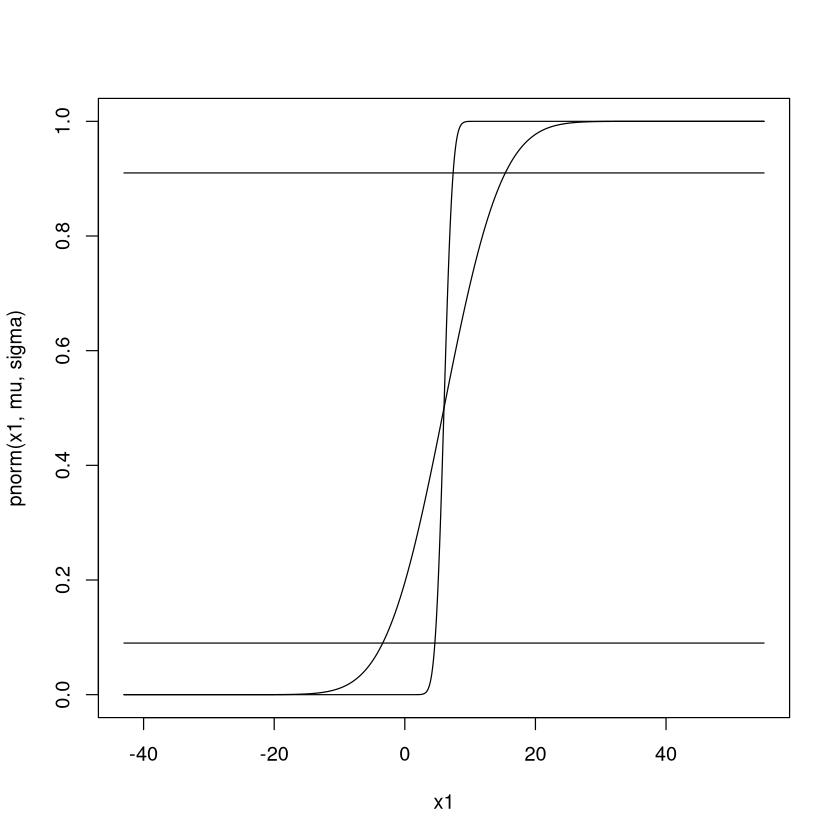

In [21]:
# (Wejściówka 3)
# Podaj X% przedział ufności dla średniej popuilacji o rozkładzie normalnym...

#Działa dla rozkładu normalnego oraz średniej arytmetycznej

#DANE:
n <- 45    #liczność próby
#sig2 <-    #wariancja
sigma <- 7  #odchylenie standardowe
mean <- 6 #Srednia arytmetyczna
perc <- 82 #procent przedziału ufności (%)


#OBLICZENIA:
mu <-mean
# sigma <- sqrt(sig2)
alpha <- 1 - perc/100
kwantyl <- qnorm(1-alpha/2, 0, 1)
cat("Kwantyl: ", kwantyl, "\n") 
cat("Poziom istotności (alpha): ", 100*alpha, "%\n") 

l_koniec_przedzialu <- mu - round(kwantyl,2)*(sigma/sqrt(n))       #odwrotnie nież w standaryzacji średniej
cat("Lewy koniec przedziału ufności: ", l_koniec_przedzialu, "\n") 
p_koniec_przedzialu <- mu + round(kwantyl,2)*(sigma/sqrt(n))  
cat("Prawy koniec przedziaexpected valuełu ufności: ", p_koniec_przedzialu, "\n") 
#cat("Długość przedziału ufności: ", p_koniec_przedzialu-l_koniec_przedzialu, "\n") 

#WYKRES:
x1 <- (((mu-1*sigma^2)*100):((mu+1*sigma^2)*100))/100 
plot(x1, pnorm(x1, mu, sigma), t='l')
lines(x1, pnorm(x1, mu, sigma/sqrt(n)), t='l')
lines(x1, x1*0+1-alpha/2)
lines(x1, x1*0+alpha/2)

In [22]:
# Niech zmienna X~N(..., ...) ma rozkład normalny o wartości oczekiwanej...

# Część z X
x_m = 2 # µ - wartość oczekiwana, średnia
x_sd = 2  # 𝜎 - odchylenie std
a = -8 # lewe ograniczenie (liczone ręcznie)
b = 4 # prawe ograniczenie (liczone ręcznie)

c = qnorm(pnorm(a, x_m, x_sd), 0, 1) # standaryzacja zmiennej
d = qnorm(pnorm(b, x_m, x_sd), 0, 1)

e = pnorm(d, 0, 1) - pnorm(c, 0, 1)

cat("c", c, "\n")
cat("d", d, "\n")
cat("e", e, "\n")

# Część z Y (sumą X-ów)
n = 12  # ilość x
x_m = 4  # 𝜇 = EX
x_sd = 7  # 𝜎 - odchylenie std
prawa = -59

f = n * x_m       # EY
g = sqrt(n)*x_sd # D(Y) sqrt(n*x_m^2)

h = qnorm(pnorm(prawa, f, g), 0, 1)

i = 1 - pnorm(h, 0, 1)   # dla znaku >
# i = pnorm(h, 0, 1)     # dla znaku <

cat("f ", f, "\n")
cat("g ", g, "\n")
cat("h ", h, "\n")
cat("i ", i, "\n")

c -5 
d 1 
e 0.8413445 
f  48 
g  24.24871 
h  -4.412606 
i  0.9999949 


In [ ]:
SST <- SSR + SSE
R2 <- SSR/SST

F_cr <_